In [94]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from halton import *
from scipy.spatial import cKDTree

In [83]:
n = 5000
n_boundary = 50

def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

inner_nodes = halton_sequence(1,n,2).T
#circularize
inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), np.sqrt(x)*np.sin(2*np.pi*y)) for (x,y) in inner_nodes])

#boundary_nodes = np.array([ boundary_param(t) for t in halton_sequence(0,n_boundary-1,1).ravel()])
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)

<IPython.core.display.Javascript object>


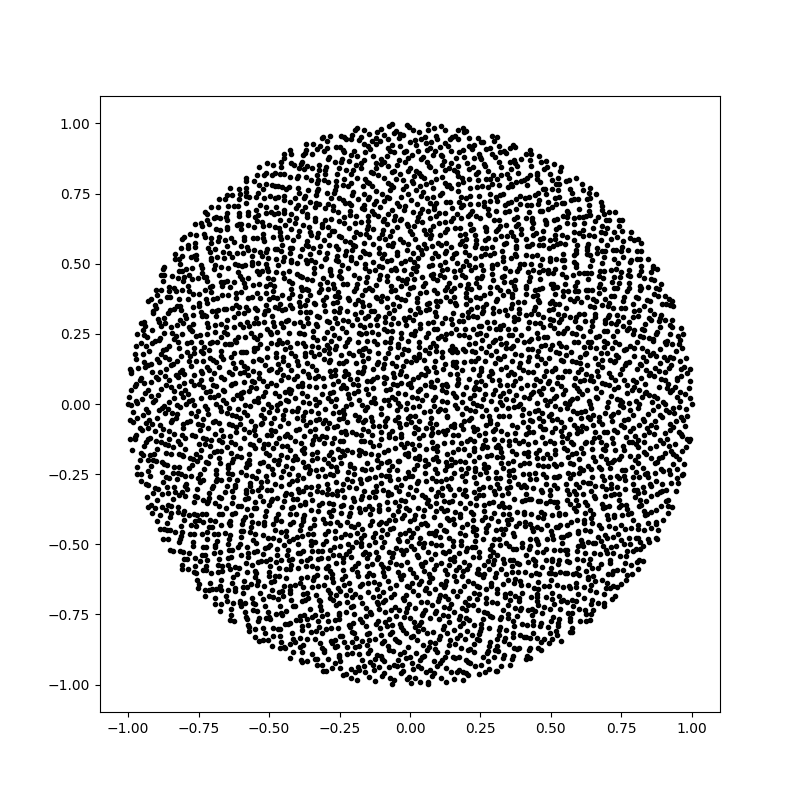

In [84]:
plt.figure(figsize=(8,8))
plt.plot(nodes[:,0], nodes[:,1], 'k.')

<IPython.core.display.Javascript object>


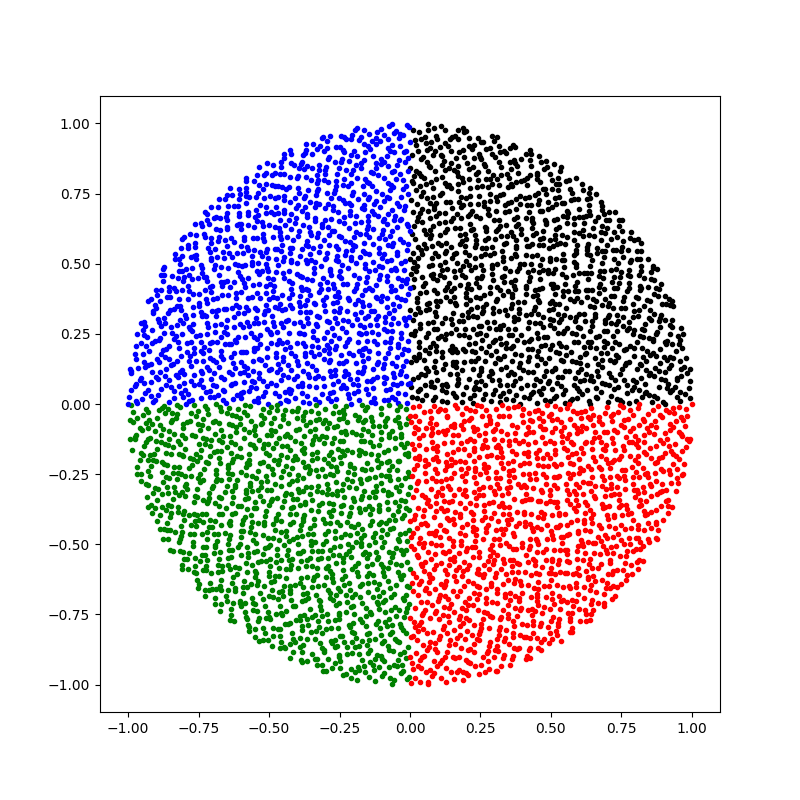

Quad1 nodes: 1264
Quad2 nodes: 1264
Quad3 nodes: 1261
Quad4 nodes: 1261


In [85]:
quad1_inner = np.array([node for node in inner_nodes if node[0]>=0 and node[1]>0])
quad2_inner = np.array([node for node in inner_nodes if node[0]<0 and node[1]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<=0 and node[1]<0])
quad4_inner = np.array([node for node in inner_nodes if node[0]>0 and node[1]<=0])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=0 and node[1]>0])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[1]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<=0 and node[1]<0])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]>0 and node[1]<=0])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

<IPython.core.display.Javascript object>


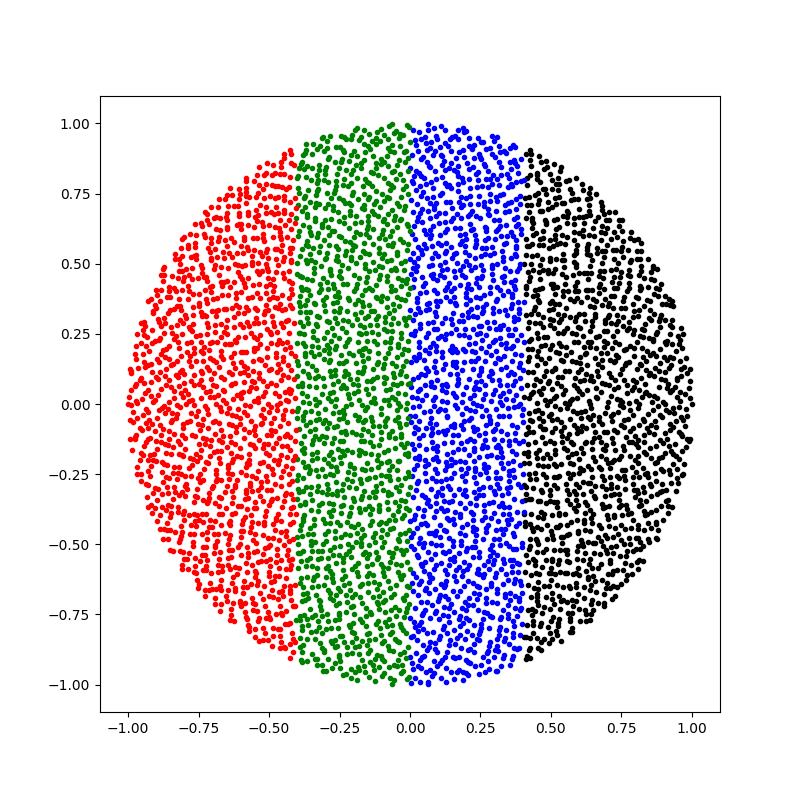

Quad1 nodes: 1273
Quad2 nodes: 1252
Quad3 nodes: 1264
Quad4 nodes: 1261


In [86]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

<IPython.core.display.Javascript object>


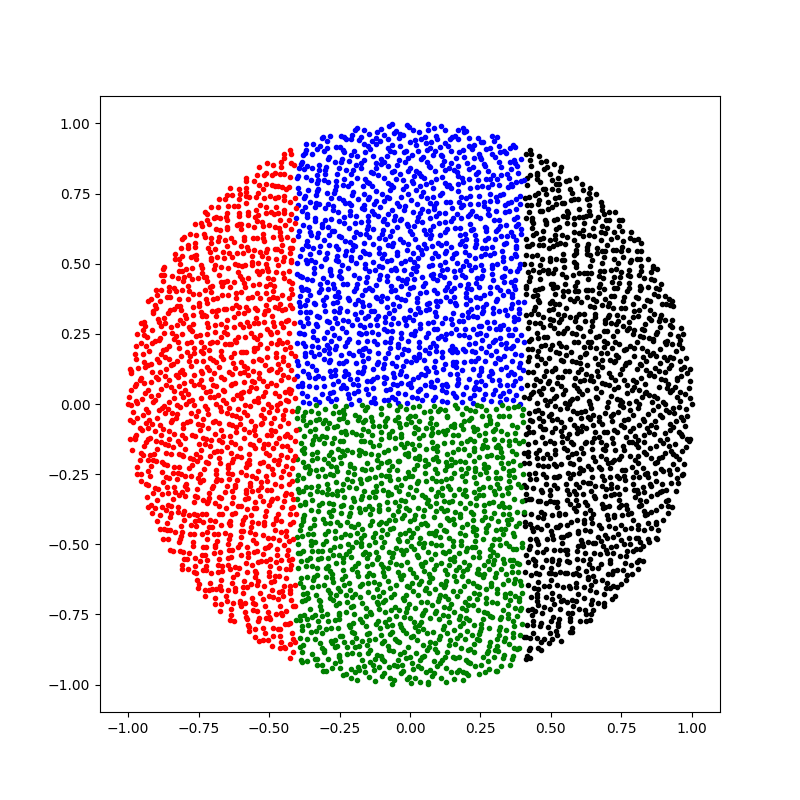

Quad1 nodes: 1273
Quad2 nodes: 1260
Quad3 nodes: 1256
Quad4 nodes: 1261


In [87]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if cutoff>node[0]>-cutoff and node[1]>=0])
quad3_inner = np.array([node for node in inner_nodes if cutoff>node[0]>-cutoff and node[1]<0])
quad4_inner = np.array([node for node in inner_nodes if node[0]<=-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if cutoff>node[0]>-cutoff and node[1]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if cutoff>node[0]>-cutoff and node[1]<0])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<=-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

<IPython.core.display.Javascript object>


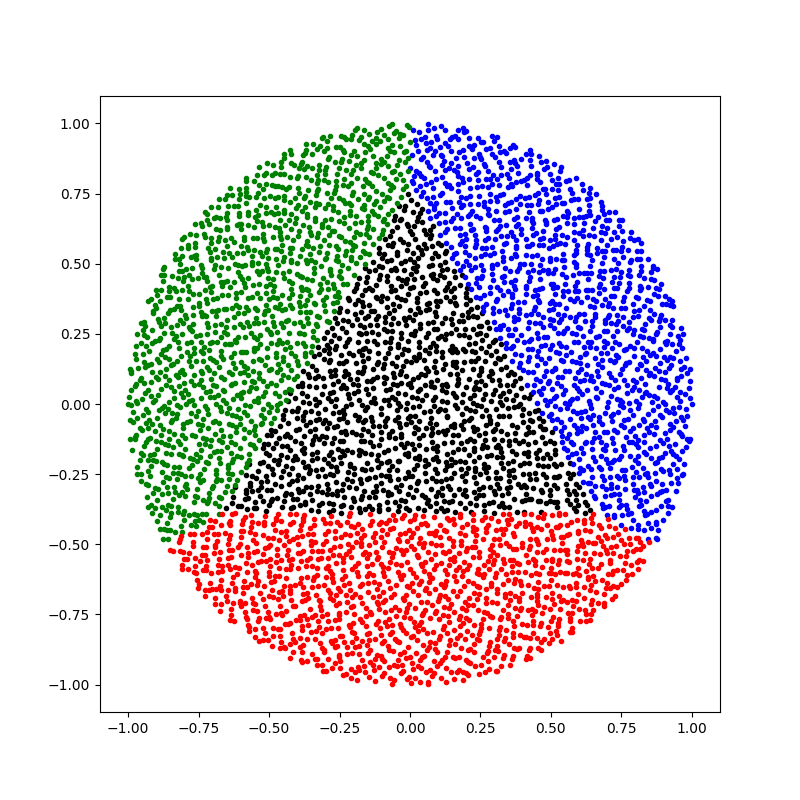

Quad1 nodes: 1243
Quad2 nodes: 1271
Quad3 nodes: 1269
Quad4 nodes: 1267


In [88]:
r = np.sqrt(np.pi/np.sqrt(27))

quad1_inner = np.array([node for node in inner_nodes 
        if node[1]>=-.5*r
        and (node[1]-r)*(np.sqrt(3/4)*r)<=(-1.5*r)*(node[0])
        and (node[1]-r)*(-np.sqrt(3/4)*r)>=(-1.5*r)*(node[0])
    ])

quad2_inner = np.array([node for node in inner_nodes 
        if (node[1]-r)*(np.sqrt(3/4)*r)>(-1.5*r)*(node[0])
        and node[0]>=0
        and node[1]>-1/np.sqrt(3)*node[0]
    ])

quad3_inner = np.array([node for node in inner_nodes 
        if (node[1]-r)*(-np.sqrt(3/4)*r)<(-1.5*r)*(node[0])
        and node[0]<0
        and node[1]>1/np.sqrt(3)*node[0]
    ])

quad4_inner = np.array([node for node in inner_nodes 
        if node[1]<-.5*r
        and node[1]<1/np.sqrt(3)*node[0]
        and node[1]<-1/np.sqrt(3)*node[0]
    ])


quad1_boundary=[]
quad2_boundary = np.array([node for node in boundary_nodes 
        if (node[1]-r)*(np.sqrt(3/4)*r)>(-1.5*r)*(node[0])
        and node[0]>=0
        and node[1]>-1/np.sqrt(3)*node[0]
    ])

quad3_boundary = np.array([node for node in boundary_nodes 
        if (node[1]-r)*(-np.sqrt(3/4)*r)<(-1.5*r)*(node[0])
        and node[0]<0
        and node[1]>1/np.sqrt(3)*node[0]
    ])

quad4_boundary = np.array([node for node in boundary_nodes 
        if node[1]<-.5*r
        and node[1]<1/np.sqrt(3)*node[0]
        and node[1]<-1/np.sqrt(3)*node[0]
    ])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.') 
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

#plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

In [55]:
def decomp0(inner_nodes, boundary_nodes, stencil_size):
    k = stencil_size
    cutoff = 0.4039727532995172

    quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
    quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
    quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
    quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

    quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
    quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
    quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
    quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

    quad1_neighbors = np.zeros((len(quad1_inner), k))
    quad_local = np.concatenate((quad1_inner, quad2_inner, quad1_boundary, quad2_boundary), axis=0)
    tree = cKDTree(nodes)
    indices = tree.query(nodes[k],l)[1]

5904

In [74]:
test = [node for node in quad1_inner if node in quad4_inner]

# 2proc testing

In [151]:
n = 400
n_boundary = 25

def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

inner_nodes = halton_sequence(1,n,2).T
#circularize
inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), np.sqrt(x)*np.sin(2*np.pi*y)) for (x,y) in inner_nodes])

#boundary_nodes = np.array([ boundary_param(t) for t in halton_sequence(0,n_boundary-1,1).ravel()])
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)

<IPython.core.display.Javascript object>


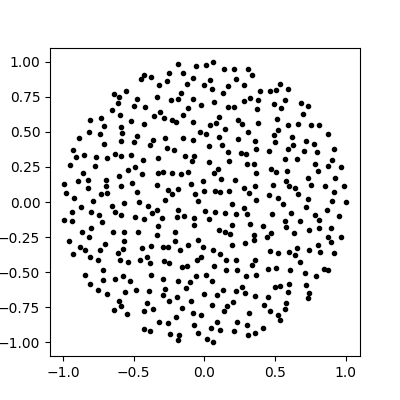

In [152]:
plt.figure(figsize=(4,4))
plt.plot(nodes[:,0], nodes[:,1], 'k.')

<IPython.core.display.Javascript object>


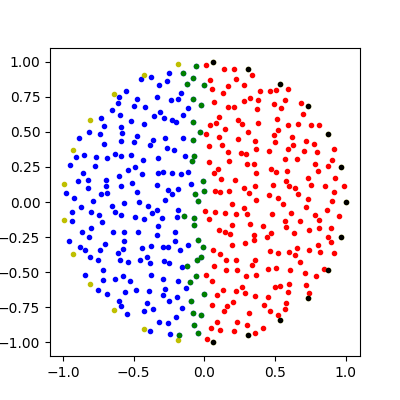

In [164]:
k = 10

nodes1 = np.array([node for node in inner_nodes if node[0]>=0])
nodes2 = np.array([node for node in inner_nodes if node[0]<0])
#nodes1_boundary = np.array([node for node in boundary_nodes if node[0]>=0])
#nodes2_boundary = np.array([node for node in boundary_nodes if node[0]<0])

neighbors = np.zeros((len(nodes1), k), dtype=np.int32)

nodes = np.concatenate((nodes1, nodes2, boundary_nodes), axis=0)
tree = cKDTree(nodes)
#indices = tree.query(nodes[k],l)[1]
for r in range(len(nodes1)):
    neighbors[r,:] = tree.query(nodes[r],k)[1]

n_to_g = []
g_to_n1
b_to_g = []
local_start = 0
local_end = len(nodes1) - 1
boundary_start = len(nodes1)+len(nodes2)
for i in neighbors.ravel():
    if i<local_start or local_end<i<boundary_start:
        if i not in n_to_g:
            n_to_g += [i]
    elif boundary_start<= i:
        if i not in b_to_g:
            b_to_g += [i]
        
node1_n = np.array([nodes[i] for i in n_to_g])
node1_b = np.array([nodes[i] for i in b_to_g])

nodes1 = np.concatenate((nodes1, node1_n, node1_b), axis=0)

plt.figure(figsize=(4,4))
plt.plot(nodes1[:,0], nodes1[:,1], 'r.')
plt.plot(nodes2[:,0], nodes2[:,1], 'b.')
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')

plt.plot(node1_n[:,0], node1_n[:,1], 'g.')
plt.plot(node1_b[:,0], node1_b[:,1], 'k.')

In [145]:
neighbors[:10]

array([[25, 46,  3, 52, 74, 38],
       [26, 67, 53, 31, 47, 61],
       [27, 40, 54, 96, 57, 34],
       [28, 64, 58, 39, 45, 73],
       [29, 51, 65, 70, 37, 74],
       [30, 66, 57, 60, 48, 33],
       [31, 44, 67, 26, 61, 49],
       [32, 55, 69, 41, 73, 36],
       [33, 70, 42, 66, 51, 30],
       [34, 62, 71, 43,  5,  4]], dtype=int32)

In [137]:
len(nodes2) - len(n_to_g)

22

In [138]:
node1_n

array([[-0.35355339,  0.61237244],
       [-0.25      , -0.4330127 ],
       [-0.33223151,  0.12092238],
       [-0.87900196, -0.31993055],
       [-0.38362074,  0.40661423],
       [-0.25852094, -0.86352008],
       [-0.82354974,  0.09625916],
       [-0.05629849,  0.96660772],
       [-0.14769477, -0.09714038],
       [-0.73847387,  0.48570191],
       [-0.02298376, -0.39461595],
       [-0.63306772, -0.073995  ],
       [-0.0878152 ,  0.29332319],
       [-0.5287847 , -0.56047903],
       [-0.26453839,  0.38570642],
       [-0.36572533, -0.76484965],
       [-0.94819874,  0.26394916],
       [-0.46919032, -0.21327317],
       [-0.59272441,  0.53786873],
       [-0.13231492, -0.61083366],
       [-0.27929829,  0.01083805],
       [-0.07752074,  0.56755223],
       [-0.71926819, -0.55747491],
       [-0.58937817,  0.32520512],
       [-0.72564809, -0.14251264],
       [-0.32152293,  0.83276528],
       [-0.26027716, -0.32269305],
       [-0.60278955,  0.74734179]])

In [158]:
5 > 2 < 1

False

In [166]:
test = {}
test[1] = 4
test[3] = 5

In [167]:
test[1]

4

In [168]:
test[2]

KeyError: 2